In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Run Psupertime

In [3]:
from sklearn import metrics
import numpy as np
from pypsupertime import Psupertime

p = Psupertime(n_batches=5, n_jobs=4,
               preprocessing_params={"select_genes": "hvg", "log": True, "scale": True, "normalize": True},
               regularization_params={"n_folds": 5,
                                      "scoring": "accuracy",
                                      "reg_path": np.geomspace(1, 0.005, 40)},
               estimator_params = {"max_iter": 1000,
                                   "early_stopping": True,
                                   "penalty": "elasticnet",
                                   "l1_ratio": 0.5}
)

adata = p.run("/home/julian/Uni/MasterThesis/data/germ_sce.h5ad", "time")

Input Data: n_genes=24153, n_cells=992
Preprocessing: done. mode='hvg', n_genes=4377, n_cells=992
Grid Search CV: CPUs=4, n_folds=5
Regularization: done   
Refit on all data: done. accuracy=0.178427.02, n_genes=1574
Total elapsed time:  0:10:03.323512


In [6]:
p.refit_and_predict(adata, method="best")

Input Data: n_genes=4377, n_cells=992
Refit on all data: done. accuracy=0.326613.02, n_genes=2239


## Inspect Results

Best idx: 36 Best Score: 0.21288259479214253 Best Lambda: 0.007515749760695052 Scores std: 0.05269500462689133
1SE idx: 33 1SE Score: 0.17032130348713262 1SE Lambda: 0.011297298893077552


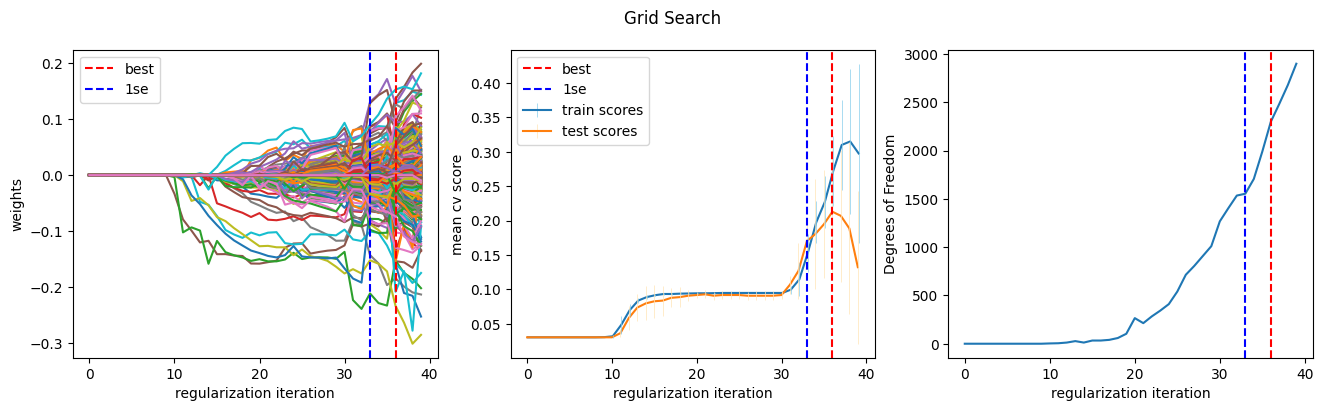

In [9]:
fig = p.plot_grid_search(title="Grid Search")

In [12]:
fig.savefig("/home/julian/Uni/MasterThesis/Psupertime/docs/images/readme_grid_search.png")

Model Degrees of freedom 2239
Accuracy: 0.32661290322580644
Balanced accuracy: 0.29064816438486657
Mean absolute delta: 1.2343891711832957


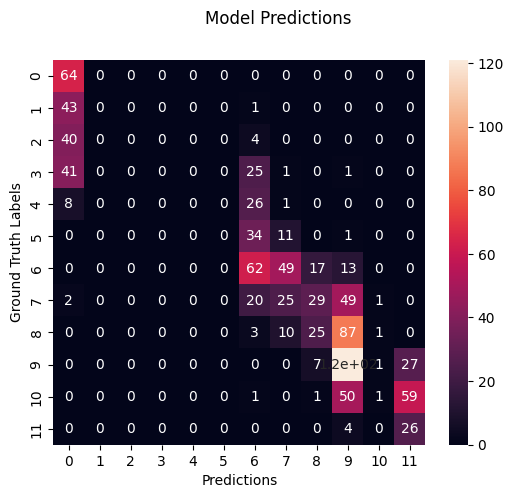

In [13]:
fig = p.plot_model_perf((adata.X, adata.obs.time), figsize=(6,5))

In [14]:
fig.savefig("/home/julian/Uni/MasterThesis/Psupertime/docs/images/readme_confusion_matrix.png")

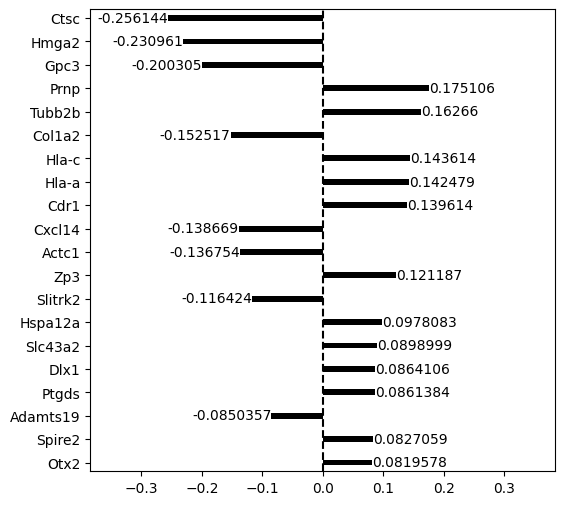

In [15]:
fig = p.plot_identified_gene_coefficients(adata, n_top=20)

In [16]:
fig.savefig("/home/julian/Uni/MasterThesis/Psupertime/docs/images/readme_genes.png")

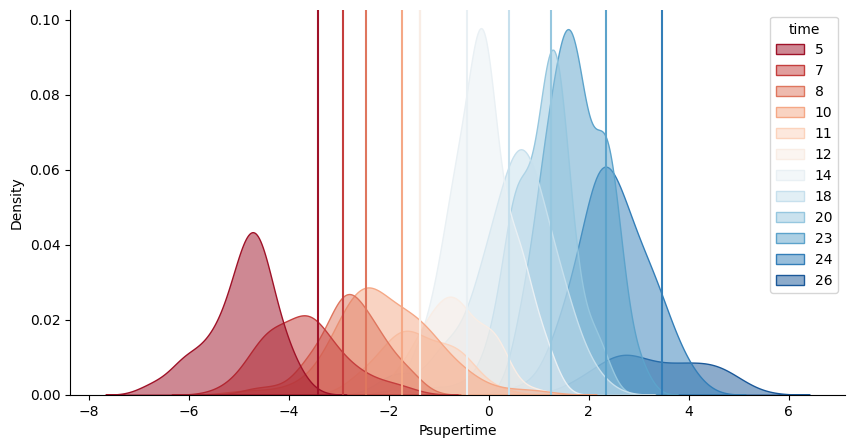

In [17]:
fig = p.plot_labels_over_psupertime(adata, "time")

In [18]:
fig.savefig("/home/julian/Uni/MasterThesis/Psupertime/docs/images/readme_labels_over_psupertime.png")